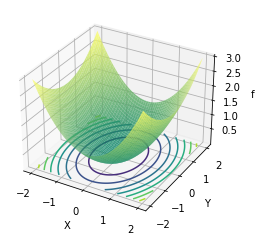

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2      # range of x

rx = 4
ry = 4

def f2(x,y):
    return 1/2*x**2 + 1/4*y**2

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f2(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()

- Write a code to solve the minimum of 2D function with Monte Carlo method

In [2]:
def MC2D(f, x0, y0, rx, ry, n):
    #parameters -> function, x0, y0, range of x, range of y, # of pts
    
    testx = x0 + np.random.random()*rx
    testy = y0 + np.random.random()*ry
    retz = f(x0, y0)
    
    for i in range(0, n):
        
        x= x0 + np.random.random()*rx
        y= y0 + np.random.random()*ry
        
        if(f(x,y) < retz):
            retz = f(x, y)
            testx = x
            testy = y
    
    return testx, testy, retz
        
print( "               X:                       Y:                     f(x, y):")
print("n = 100:    ", MC2D(f2, -2, -2, rx, ry, 100))
print("n = 1000:   ", MC2D(f2, -2, -2, rx, ry, 1000))
print("n = 10000:  ", MC2D(f2, -2, -2, rx, ry, 10000))
print("n = 100000: ", MC2D(f2, -2, -2, rx, ry, 100000))

               X:                       Y:                     f(x, y):
n = 100:     (0.03617038137314221, 0.2685876001310219, 0.018688972980374707)
n = 1000:    (0.01262862390108932, -0.07412971168905313, 0.0014535446095931175)
n = 10000:   (0.01615237286442328, 0.007455678926144849, 0.00014434636163811887)
n = 100000:  (-0.0025647453439696655, -0.010787449209848976, 3.238122445347486e-05)


- Write a code to solve the minimum of 2D function using the gradient decent method with variable step size by following the [wikipedia page](https://en.wikipedia.org/wiki/Gradient_descent)

In [3]:
def derix(f, x,y,  h=1e-5):
    
    return (f(x+h, y)-f(x, y))/h

def deriy(f, x,y, h=1e-5):
    return (f(x, y+h)-f(x, y))/h
    

def minimize2(f2, x0,y0, N=1000):
    
    x_now = x0
    y_now = y0
    
    x_prev = None
    y_prev = None
    converged = False
    
    for i in range(N):
        if x_prev is None and y_prev is None:
            dx = 0.01
        else:
            dfxy = derix(f2, x_now, y_now) - deriy(f2,x_prev, y_prev)
            dx = (x_now - x_prev)/dfxy
        x_next = x_now - derix(f2, x_now, y_now)*dx
        y_next = y_now - deriy(f2,x_now, y_now)*dx
        
        if (f2(x_next, y_next) < f2(x_now, y_now) and f2(x_next, y_next) < f2(x_now, y_now)):
            x_prev = x_now
            x_now = x_next
            
            y_prev = y_now
            y_now = y_next

        else:
            converged = True
            break
    
    return converged, x_now, y_now, f2(x_now, y_now)
x0 = -2 + np.random.random()*4
y0 = -2 + np.random.random()*4

coverged, xarray, yarray, fmin = minimize2(f2,x0, y0, N=1000 )

print( "minimum: ", fmin)

minimum:  0.05318705143337707
